In [1]:

import warnings

warnings.filterwarnings('ignore')



### Read COMPAS data


In [2]:

import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv('compas-scores-two-years.csv', index_col='id')
df = df.reset_index(drop=True)


In [3]:

len(df)


7214

In [4]:

df.head()


,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [5]:

df.columns


Index(['name', 'first', 'last', 'compas_screening_date', 'sex', 'dob', 'age',
       'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date',
       'c_arrest_date', 'c_days_from_compas', 'c_charge_degree',
       'c_charge_desc', 'is_recid', 'r_case_number', 'r_charge_degree',
       'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in',
       'r_jail_out', 'violent_recid', 'is_violent_recid', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [6]:

df[['first', 'last', 'decile_score', 'is_recid']].head()


,first,last,decile_score,is_recid
0,miguel,hernandez,1,0
1,kevon,dixon,3,1
2,ed,philo,4,1
3,marcu,brown,8,0
4,bouthy,pierrelouis,1,0


In [7]:

df.groupby('score_text')['decile_score'].value_counts().sort_values(ascending=False)


score_text  decile_score
Low         1               1440
            2                941
            4                769
            3                747
Medium      5                681
            6                641
            7                592
High        8                512
            9                508
            10               383
Name: decile_score, dtype: int64


### Install the Bias Detector


In [8]:

%%capture

pip install --upgrade bias-detector


In [9]:

from bias_detector.BiasDetector import BiasDetector

bias_detector = BiasDetector(country='US')



### Prepare input for Bias Detector


In [10]:

first_names = df['first']
last_names = df['last']
y_pred = df['decile_score'].astype(float) >= 5
y_true = df['two_year_recid'].astype(float)
y_scores = df['decile_score'].astype(float)


In [11]:

df['sex'].value_counts()


Male      5819
Female    1395
Name: sex, dtype: int64

In [12]:

df['race'].value_counts()


African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

In [13]:

p_groups = pd.DataFrame(index=list(range(len(df))))
p_groups['male'] = df['sex'] == 'Male'
p_groups['female'] = df['sex'] == 'Female'
p_groups['white'] = df['race'] == 'Caucasian'
p_groups['black'] = df['race'] == 'African-American'
p_groups['api'] = df['race'] == 'Asian'
p_groups['hispanic'] = df['race'] == 'Hispanic'
p_groups['native'] = df['race'] == 'Native American'
p_groups = p_groups.fillna(0)
p_groups = p_groups.astype(float)


In [14]:

p_groups.sum()


male        5819.0
female      1395.0
white       2454.0
black       3696.0
api           32.0
hispanic     637.0
native        18.0
dtype: float64

In [15]:

p_groups.head()


,male,female,white,black,api,hispanic,native
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0



### Detect bias using the defendant's gender/race


In [16]:

direct_bias_report = bias_detector.get_bias_report(y_pred = y_pred, 
                                            y_true = y_true, 
                                            p_groups = p_groups)


In [17]:

direct_bias_report.print_summary()


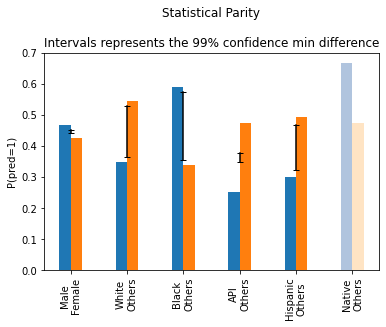

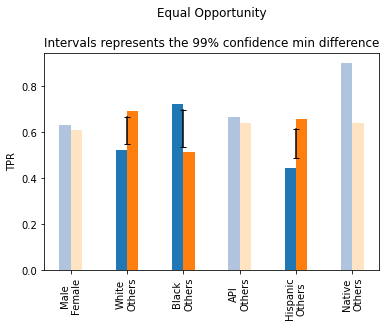

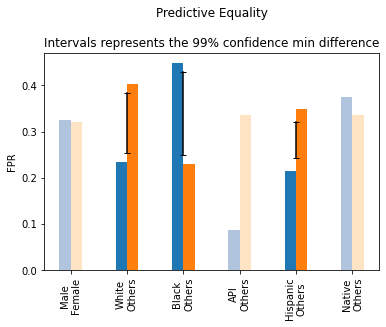

In [18]:

direct_bias_report.plot_summary()


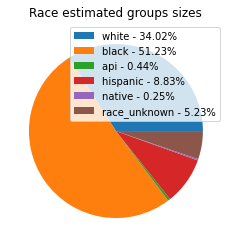

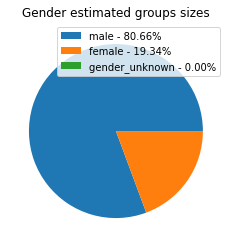

In [19]:

direct_bias_report.plot_groups()


In [20]:

direct_bias_report.estimated_groups_sizes


male              5819
female            1395
white             2454
black             3696
api                 32
hispanic           637
native              18
gender_unknown       0
race_unknown       377
dtype: int64


### Detect bias using the defendant's name


In [21]:

inferred_bias_report = bias_detector.get_bias_report(first_names = first_names,
                                            last_names = last_names,
                                            y_pred = y_pred, 
                                            y_true = y_true)


In [22]:

inferred_bias_report.print_summary()


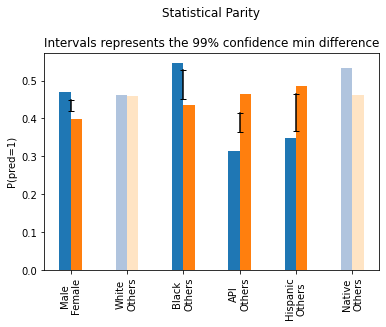

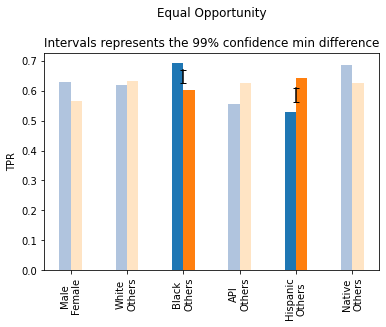

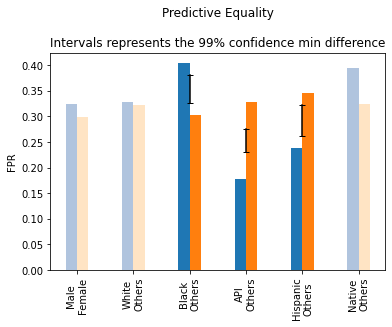

In [23]:

inferred_bias_report.plot_summary()


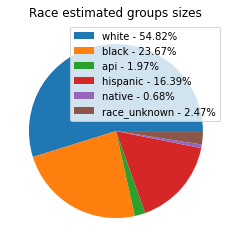

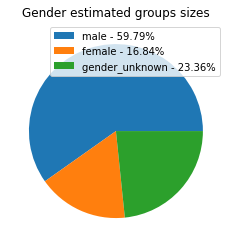

In [24]:

inferred_bias_report.plot_groups()


In [25]:

inferred_bias_report.estimated_groups_sizes


male              4313
female            1215
white             3887
black             1678
api                140
hispanic          1162
native              48
gender_unknown    1685
race_unknown       175
dtype: int64


### Bias Detector gender/race probablities


In [26]:

df[['first', 'last', 'race']].join(inferred_bias_report.p_groups).sample(10)


,first,last,race,male,female,white,black,api,hispanic,native
6674,antonio,walsh,African-American,0.989583,0.010417,0.623839,0.023804,0.011802,0.310017,0.000000
6379,mario,garcia,Hispanic,0.984252,0.015748,0.002452,0.000328,0.001035,0.995871,0.000196
4869,joshe,bittelman,Caucasian,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6953,ralante,archibald,African-American,0.000000,0.000000,0.738600,0.198500,0.007300,0.036000,0.003100
4938,rosalia,poirier,Caucasian,0.000000,1.000000,0.685001,0.004622,0.011729,0.298648,0.000000
4140,michael,mcdonald,African-American,0.995456,0.004544,0.883581,0.088535,0.001405,0.006760,0.004342
234,eric,avery,Caucasian,0.996337,0.003663,0.759746,0.199632,0.002794,0.009714,0.005717
2378,breon,brown,African-American,0.000000,0.000000,0.579500,0.356000,0.005100,0.025200,0.008700
5135,jay,fisher,Caucasian,0.975207,0.024793,0.917969,0.023384,0.004558,0.004958,0.012149
656,walter,samuels,African-American,0.995012,0.004988,0.284459,0.686294,0.001535,0.014437,0.001651
